In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [2]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Ureter_LowerUreter_HCLAdultUreter"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/Ureter_LowerUreter_HCLAdultUreter/")

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [3]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv.gz"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tsv.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


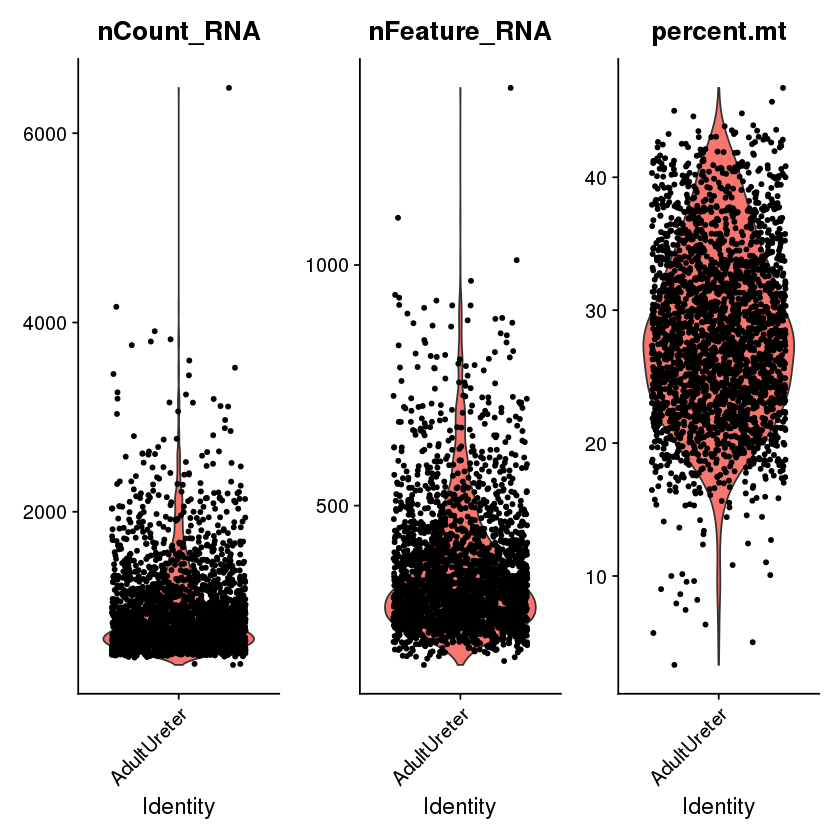

In [21]:
# Pre-processing
min.cells = 50
min.features = 200
nFeature_RNA_range = c(min.features, 600)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [22]:
percent.mt.thre = 50
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [23]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 2926 by 2205

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2205 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 6 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 2926 genes



  |======================================================================| 100%


Computing corrected count matrix for 2926 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.169211 mins

Determine variable features

Set 2926 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  RPS27, RPL34, RPS18, MT-CO3, S100A2, RPL31, RPL7, RPS27A, RPS3A, RPS14 
	   RPL32, RPLP1, RPS29, RPL21, RPL37, RPL30, RPL37A, RPL35A, RPL10, RPS15A 
	   RPL11, RPL27A, RPL12, RPS25, RPS17, RPL13, RPL39, RPS3, RPS6, RPL14 
Negative:  B2M, CD74, CST3, HLA-DRB1, UPK1A, UPK2, HLA-DRA, UPK3A, ADIRF, HSPA1A 
	   HLA-DPB1, VIM, PSAP, HLA-DPA1, FOS, SRGN, LGALS1, FTL, HLA-B, HSPA8 
	   DCN, CFD, CD24, HLA-DQA1, MGP, FTH1, TMSB10, HLA-DRB6, SNCG, PEBP1 
PC_ 2 
Positive:  MT-RNR2, MT-RNR1, VIM, CFD, DCN, FOS, LGALS1, MGP, SRGN, TIMP1 
	   IGFBP7, S100A4, IFITM2, MT2A, JUNB, RGS2, ZFP36, TMSB4X, ID2, CLU 
	   JUN, CYR61, PSAP, CCL4, S100A10, HSPA1A, EEF1A1, CXCL2, GADD45B, JCHAIN 
Negative:  SPINK1, S100P, MT-ATP6, ADIRF, MT-ND4, SNCG, FXYD3, UPK1A, MGST1, DHRS2 
	   S100A6, CD24, MT-ND5, S100A11, UPK2, MT-CYB, CSTB, UQCRQ, MT-ND3, VAMP8 
	   CYB5A, UPK1B, MT-ND4L, UPK3A, MT-CO1, TM4SF1, PVALB, CAPG, CLDN4, MT-CO2 
PC_ 3 
Positive:  MTATP6P1, MTND2P28, CLDN4, TACSTD2, EEF1A1, KR

png 
  2

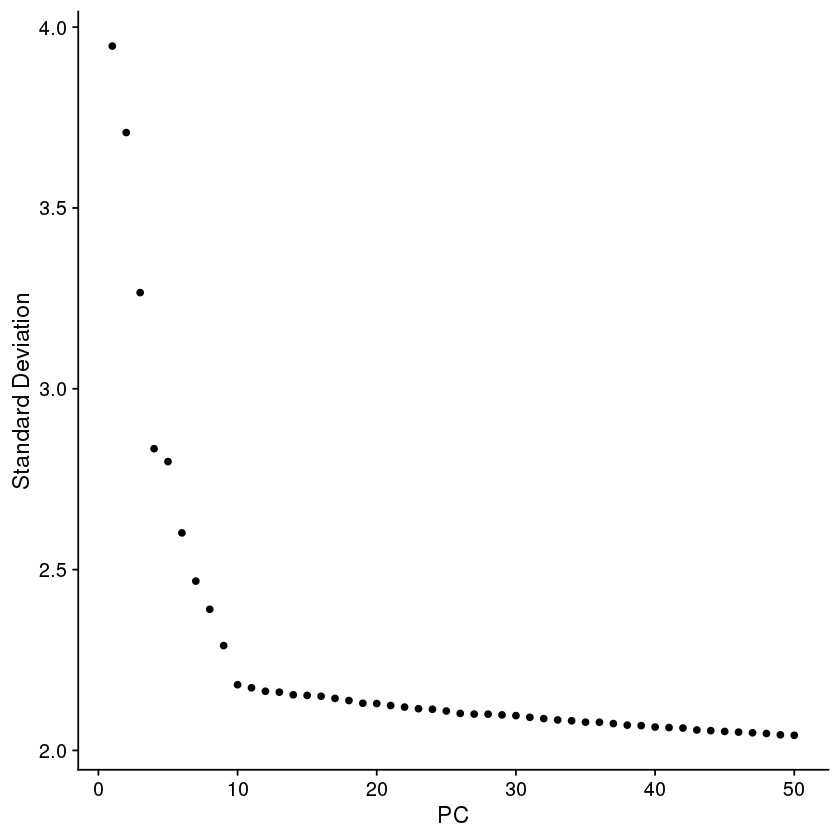

In [24]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [26]:
pcDim = 35 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [28]:
dataobj <- FindClusters(dataobj, resolution = 1.2, n.start = 5)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2205
Number of edges: 136308

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.4108
Number of communities: 9
Elapsed time: 0 seconds


1 singletons identified. 8 final clusters.



ARI 
0.07583491

In [29]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

11:19:28 UMAP embedding parameters a = 0.9922 b = 1.112

11:19:28 Read 2205 rows and found 35 numeric columns

11:19:28 Using Annoy for neighbor search, n_neighbors = 30

11:19:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

11:19:29 Writing NN index file to temp file /tmp/Rtmplva4G9/file24c6234f4bec

11:19:29 Searching Annoy index using 1 thread, search_k = 3000

11:19:30 Annoy recall = 100%

11:19:30 Commencing smooth kNN distance calibration using 1 thread

11:19:31 Initializing from normalized Laplacian + noise

11:19:31 Commencing optimization for 500 epochs, with 82992 positive edges

11:19:39 Optimization finished



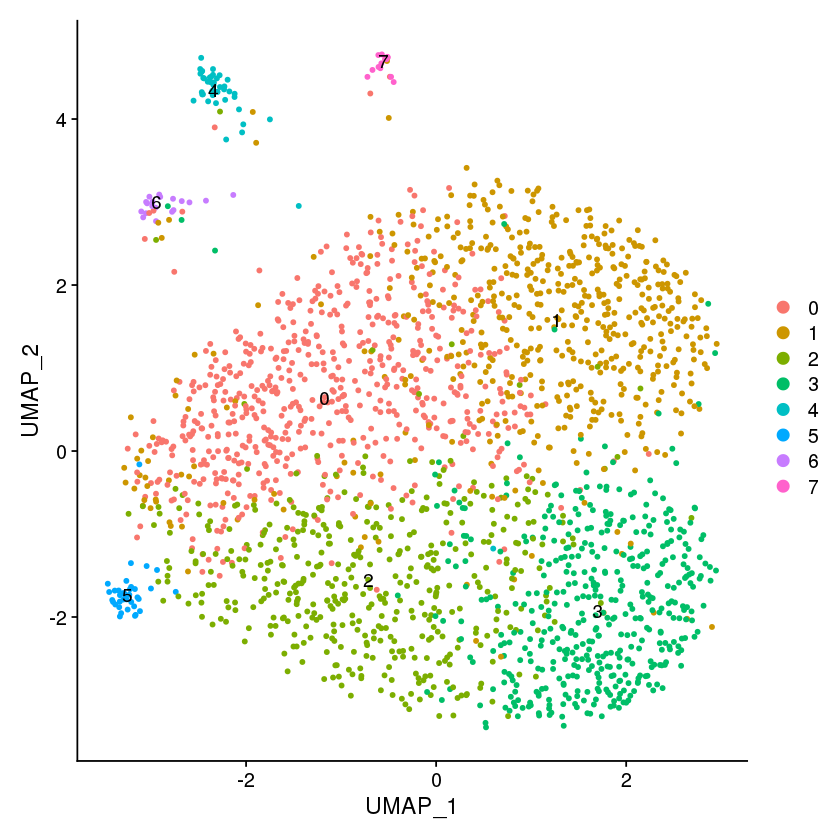

In [30]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

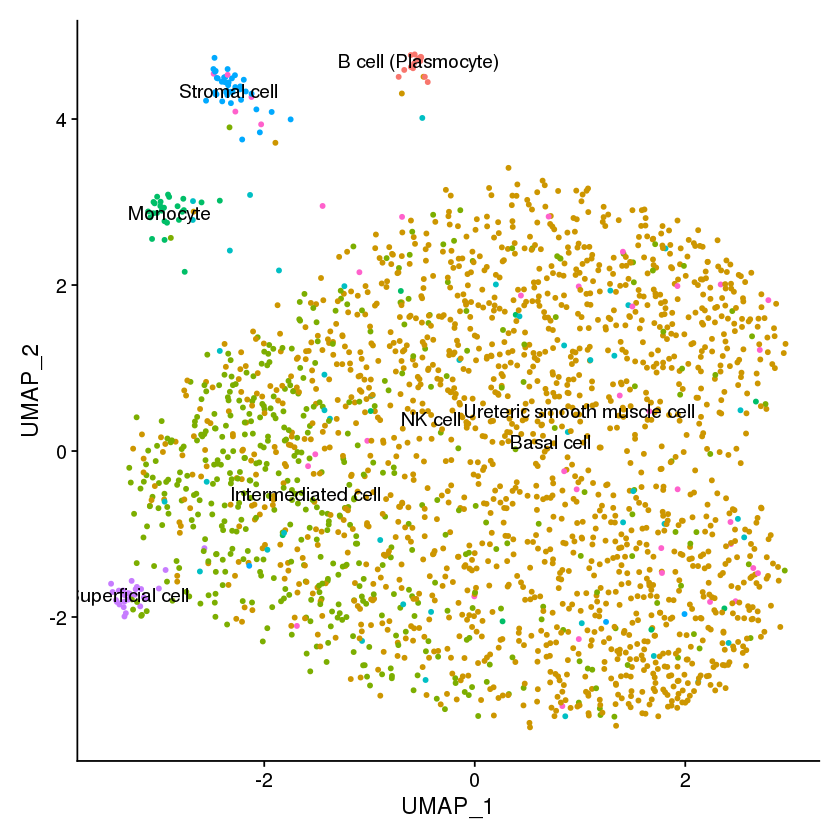

In [31]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [42]:
new.cluster.ids <- c("Ureter-Epithelial tissue-Umbrella cell-SPINK1", 
                     "Ureter-Unknown", 
                     "Ureter-Epithelial tissue-Umbrella cell-SPINK1", 
                     "Ureter-Unknown", 
                     "Ureter-Connective tissue-Stromal cell-DCN", 
                     "Ureter-Epithelial tissue-Superficial cell-UPK2", 
                     "Ureter-Connective tissue-Monocyte-HLA-DRA1", 
                     "Ureter-Connective tissue-B cell-JCHAIN "
                    )

In [41]:
subset(dataobj.markers,cluster=='7')
# subset(dataobj.markers,gene=='LYVE1')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
JCHAIN,1.472640e-144,3.2741999,0.929,0.013,4.308944e-141,7,JCHAIN
FKBP11,1.896174e-73,0.7453938,0.714,0.017,5.548205e-70,7,FKBP11
IGHA1,5.645614e-55,4.2497710,0.786,0.031,1.651907e-51,7,IGHA1
HERPUD1,3.770714e-26,1.3290258,0.857,0.089,1.103311e-22,7,HERPUD1
TSC22D3,1.349971e-25,1.1561466,0.786,0.073,3.950016e-22,7,TSC22D3
MT1E,1.957217e-22,0.5929116,0.429,0.023,5.726816e-19,7,MT1E
IGHA2,3.157844e-20,3.8845624,0.429,0.026,9.239851e-17,7,IGHA2
SEC11C,1.244232e-18,0.4900108,0.571,0.049,3.640622e-15,7,SEC11C
SRGN1,5.075252e-18,0.7000762,0.500,0.039,1.485019e-14,7,SRGN


In [43]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [44]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

12:50:37 UMAP embedding parameters a = 0.9922 b = 1.112

12:50:37 Read 2205 rows and found 35 numeric columns

12:50:37 Using Annoy for neighbor search, n_neighbors = 30

12:50:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

12:50:38 Writing NN index file to temp file /tmp/Rtmplva4G9/file24c6113f1df9

12:50:38 Searching Annoy index using 1 thread, search_k = 3000

12:50:39 Annoy recall = 100%

12:50:39 Commencing smooth kNN distance calibration using 1 thread

12:50:40 Initializing from normalized Laplacian + noise

12:50:40 Commencing optimization for 500 epochs, with 82992 positive edges

12:50:48 Optimization finished



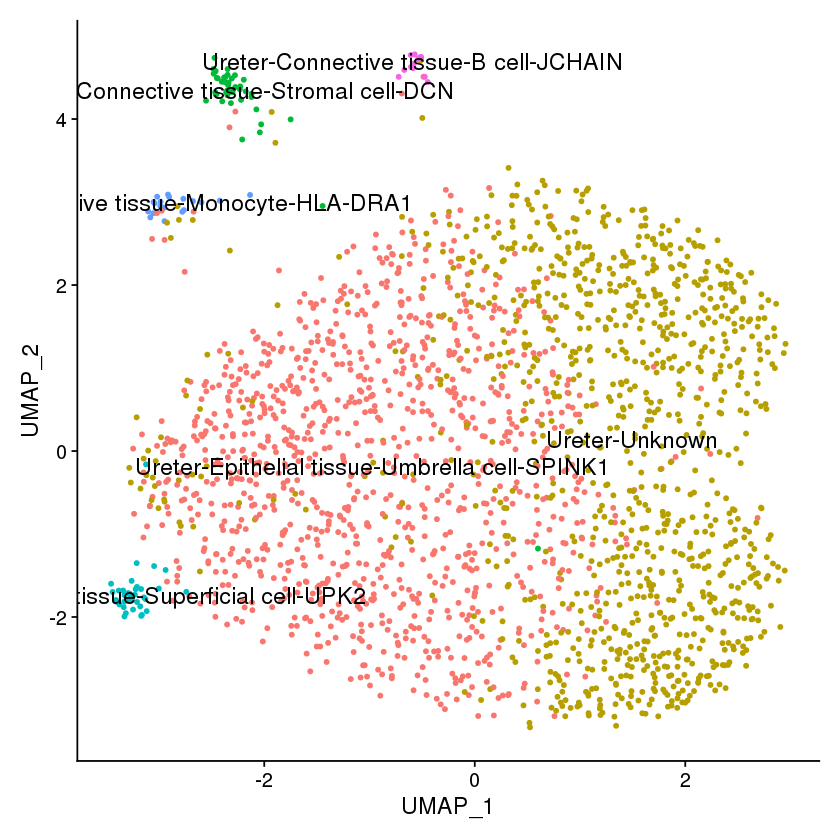

In [45]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [32]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE,)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [46]:

write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [3]:
dataobj.dbupload_v1 <- readRDS(paste0(datasetName,".seuratobj.dbupload_v1.rds"))

In [6]:
dataobj.dbupload_v1$hcad_name<- sub("JCHAIN ","JCHAIN",dataobj.dbupload_v1$hcad_name)
unique(dataobj.dbupload_v1[['hcad_name']])

,hcad_name
,<chr>
AdultUreter_1.AAAACGAAAACGTGAAGC,Unknown
AdultUreter_1.AAAACGAACCTAGCTCAA,Ureter-Epithelial tissue-Umbrella cell-SPINK1
AdultUreter_1.AAAACGCTCCATCGGCAG,Ureter-Connective tissue-Monocyte-HLA-DRA
AdultUreter_1.AAAGTTCCTTTCCAAAGT,Ureter-Connective tissue-B cell-JCHAIN
AdultUreter_1.AACCTAAAAACGTGTGCG,Ureter-Connective tissue-Stromal cell-DCN
AdultUreter_1.AATAAAAGGGTCTTAACT,Ureter-Epithelial tissue-Superficial cell-UPK2


In [8]:
saveRDS(dataobj.dbupload_v1, file = paste0(datasetName,".seuratobj.dbupload_v1.rds"))